#BEHAVIORAL SEGMENTATION

Behavioral segmentation divides consumers according to behavior patterns as they interact with a company. As the name suggests, this category of segmentation studies the behavioral traits of consumers — their knowledge of, attitude towards, use of, likes/dislikes of, or response to a product, service, promotion, or brand.


#IMPORTANCE
*   Identifies the most engaged users
*   Allows marketers to optimize their positioning and marketing messages toward the customer data at hand
*   Provides refined personalized experiences

# segments for grouping customers by:
*   Purchase behavior & tendencies.
*   Occasion and timing
*   Benefits sought
*   Customer loyalty



In [ ]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
from pymongo import MongoClient
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import datetime as dt
from operator import attrgetter
from sklearn.cluster import KMeans
import warnings
import os
# importing DateTime module to convert extracted dates
import datetime as dt

In [ ]:
db_name = "Processed_Thrifty_Database"
host = "capstone-cosmos-db.mongo.cosmos.azure.com"
port = 10255
username = "capstone-cosmos-db"
password = "BuYmUjcc9LwFDN2PdVNuUudZTG5ABlxPoZgdIoRlrugcfiF5Rm15REQOJL1dspgH28NeeJI5dOeMCwzqRRrCvg=="
args = "ssl=true&retrywrites=false&ssl_cert_reqs=CERT_NONE"

In [ ]:
connection_uri = f"mongodb://{username}:{password}@{host}:{port}/{db_name}?{args}"
client = MongoClient(connection_uri)
 
db = client[db_name]
collection = db['Customer_Segmentation']

In [ ]:
data= pd.DataFrame(list(collection.find()))
data.head(2)

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age
0,6094edbae1a88135b12d145c,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0
1,6094edbbe1a88135b12dcdaf,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0


In [ ]:
df=data.drop(['AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Latitude','Longitude','_id','Birthdate','Dt_Customer'], axis=1)
df.head(2)

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age
0,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0
1,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0


#COHORT ANALYSIS

A cohort is a group of users sharing a particular characteristic
Cohort analysis refers to tracking and investigating the performance of cohorts over time.

#APPROACH
Segment customers into cohorts based on the month they made their first purchase in.

* Segment customers into cohorts based on the month they made their first purchase in.
*   We will then assign a cohort index to each purchase of all the customer. 
Cohort Index assigned will represent months since the 1st transaction of that particular customer.
*   In the Last step, we will calculate various business metrics such as retention rate and build a Cohort Chart using Heatmap to represent the results.





In [ ]:
df['order_date'] = df['Transaction_Date'].dt.date
df['cohort'] = df.groupby('Customer_Id')['Transaction_Date'] \
                 .transform('min') \
                 .dt.date 
df.head()

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
0,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-09-28,2018-01-01
1,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-06-12,2018-01-01
2,1680,2020-12-22 22:58:31,3001,9,27,poor,showroom,customer,3,1,2020,December,23:58:31,23,4,Tuesday,Weekday,No,None,dresses,100,900,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-12-22,2018-01-01
3,1680,2019-08-31 23:53:24,3001,3,18,good,online,website,-1,4,2019,September,01:53:24,1,3,Sunday,Weekend,No,None,dresses,100,300,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2019-08-31,2018-01-01
4,1680,2019-03-10 19:27:23,3001,1,43,excellent,online,unnamed,-1,5,2019,March,20:27:23,20,1,Sunday,Weekend,No,None,dresses,100,100,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2019-03-10,2018-01-01


In [ ]:
df_cohort = df.groupby(['cohort', 'order_date']) \
              .agg(n_customers=('Customer_Id', 'nunique')) \
              .reset_index(drop=False)
df_cohort['Cohort_index'] = (df_cohort.order_date - df_cohort.cohort).apply(attrgetter('days'))
df_cohort

,cohort,order_date,n_customers,Cohort_index
0,2018-01-01,2018-01-01,732,0
1,2018-01-01,2018-01-02,224,1
2,2018-01-01,2018-01-03,221,2
3,2018-01-01,2018-01-04,237,3
4,2018-01-01,2018-01-05,229,4
...,...,...,...,...
19386,2018-01-24,2020-12-13,1,1054
19387,2018-01-24,2020-12-14,1,1055
19388,2018-01-24,2020-12-15,1,1056
19389,2018-01-24,2020-12-22,1,1063


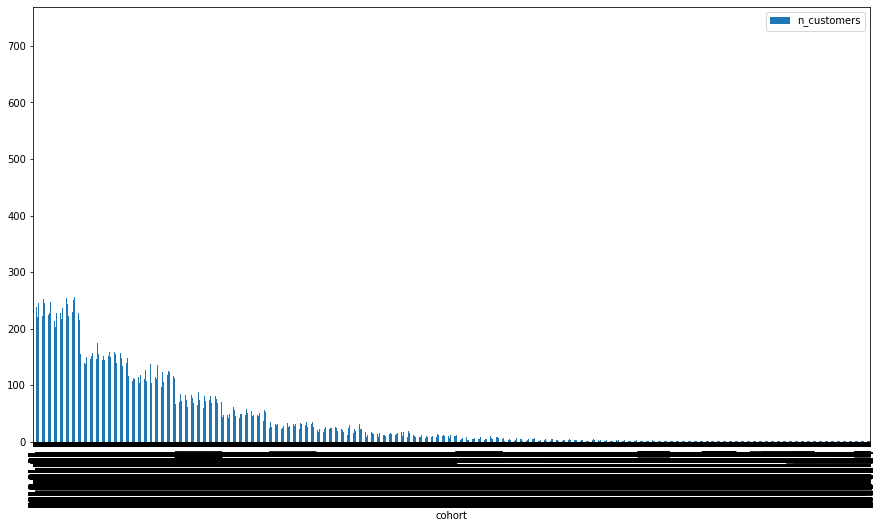

In [ ]:
df_cohort.plot.bar(x='cohort', y='n_customers', rot=90, figsize=(15,8))

In [ ]:
#visual here to show trend

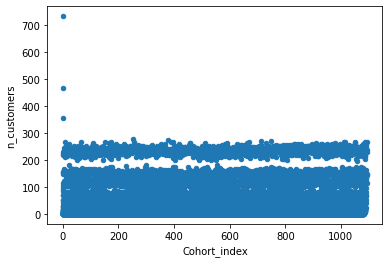

In [ ]:
df_cohort.plot.scatter('Cohort_index','n_customers')

In [ ]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'Cohort_index',
                                     values = 'n_customers')
cohort_pivot

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,732.0,224.0,221.0,237.0,229.0,231.0,244.0,236.0,268.0,212.0,248.0,237.0,245.0,221.0,249.0,226.0,235.0,215.0,251.0,229.0,228.0,242.0,243.0,230.0,260.0,226.0,239.0,241.0,243.0,232.0,224.0,226.0,241.0,249.0,221.0,215.0,233.0,243.0,237.0,250.0,...,253.0,205.0,197.0,235.0,223.0,235.0,217.0,218.0,217.0,242.0,237.0,239.0,221.0,236.0,242.0,235.0,254.0,226.0,234.0,241.0,215.0,223.0,235.0,251.0,245.0,259.0,231.0,230.0,224.0,235.0,216.0,269.0,216.0,205.0,248.0,241.0,258.0,237.0,232.0,268.0
2018-01-02,468.0,158.0,157.0,155.0,164.0,151.0,168.0,156.0,155.0,162.0,155.0,144.0,131.0,137.0,145.0,147.0,151.0,155.0,152.0,133.0,144.0,143.0,183.0,146.0,149.0,143.0,144.0,131.0,165.0,133.0,123.0,144.0,146.0,166.0,148.0,169.0,168.0,151.0,152.0,129.0,...,147.0,173.0,156.0,153.0,157.0,168.0,147.0,146.0,142.0,162.0,145.0,135.0,141.0,152.0,140.0,158.0,174.0,156.0,145.0,159.0,158.0,136.0,143.0,142.0,146.0,151.0,170.0,144.0,158.0,151.0,161.0,154.0,153.0,162.0,164.0,139.0,137.0,148.0,145.0,NaN
2018-01-03,356.0,105.0,117.0,107.0,108.0,122.0,114.0,118.0,116.0,119.0,117.0,118.0,117.0,106.0,106.0,124.0,105.0,118.0,115.0,118.0,104.0,116.0,120.0,113.0,104.0,117.0,127.0,103.0,126.0,109.0,113.0,123.0,119.0,112.0,99.0,114.0,114.0,124.0,105.0,121.0,...,115.0,123.0,119.0,117.0,113.0,107.0,116.0,119.0,120.0,116.0,114.0,113.0,127.0,129.0,119.0,113.0,95.0,112.0,100.0,107.0,116.0,117.0,136.0,98.0,101.0,102.0,107.0,113.0,102.0,110.0,122.0,121.0,113.0,104.0,99.0,118.0,131.0,114.0,NaN,NaN
2018-01-04,231.0,71.0,85.0,72.0,80.0,69.0,65.0,76.0,58.0,75.0,72.0,72.0,70.0,68.0,77.0,81.0,68.0,67.0,74.0,73.0,75.0,76.0,66.0,84.0,69.0,77.0,69.0,63.0,71.0,82.0,70.0,67.0,80.0,84.0,90.0,68.0,77.0,75.0,65.0,80.0,...,80.0,70.0,75.0,65.0,82.0,79.0,78.0,75.0,73.0,74.0,71.0,78.0,78.0,83.0,77.0,82.0,64.0,68.0,88.0,85.0,70.0,75.0,82.0,61.0,71.0,83.0,79.0,87.0,70.0,60.0,73.0,66.0,78.0,73.0,67.0,81.0,72.0,NaN,NaN,NaN
2018-01-05,150.0,51.0,51.0,47.0,50.0,45.0,52.0,41.0,47.0,43.0,58.0,50.0,51.0,44.0,44.0,42.0,50.0,45.0,44.0,49.0,44.0,41.0,41.0,36.0,53.0,50.0,50.0,49.0,56.0,42.0,49.0,47.0,44.0,59.0,46.0,53.0,51.0,47.0,56.0,42.0,...,54.0,45.0,49.0,45.0,48.0,46.0,44.0,53.0,49.0,41.0,47.0,51.0,49.0,44.0,40.0,47.0,37.0,46.0,41.0,49.0,54.0,46.0,62.0,54.0,47.0,43.0,50.0,45.0,45.0,45.0,59.0,62.0,63.0,55.0,52.0,40.0,NaN,NaN,NaN,NaN
2018-01-06,93.0,28.0,31.0,28.0,26.0,35.0,33.0,31.0,34.0,33.0,31.0,37.0,25.0,36.0,27.0,26.0,31.0,29.0,36.0,30.0,24.0,33.0,27.0,37.0,23.0,30.0,30.0,33.0,32.0,26.0,30.0,27.0,22.0,35.0,24.0,36.0,34.0,30.0,26.0,33.0,...,25.0,35.0,23.0,25.0,34.0,30.0,30.0,22.0,39.0,36.0,25.0,43.0,33.0,34.0,26.0,29.0,29.0,24.0,32.0,27.0,29.0,31.0,31.0,30.0,32.0,23.0,30.0,23.0,25.0,24.0,30.0,26.0,25.0,32.0,22.0,NaN,NaN,NaN,NaN,NaN
2018-01-07,70.0,18.0,16.0,20.0,19.0,23.0,25.0,19.0,31.0,21.0,23.0,21.0,25.0,24.0,21.0,20.0,18.0,21.0,14.0,16.0,17.0,22.0,23.0,22.0,20.0,22.0,17.0,19.0,20.0,23.0,15.0,28.0,24.0,20.0,21.0,15.0,19.0,22.0,19.0,27.0,...,23.0,21.0,18.0,23.0,24.0,26.0,28.0,34.0,25.0,27.0,21.0,18.0,22.0,18.0,20.0,21.0,18.0,21.0,21.0,27.0,34.0,19.0,20.0,19.0,25.0,30.0,22.0,24.0,23.0,28.0,23.0,25.0,21.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,42.0,11.0,15.0,13.0,13.0,10.0,16.0,17.0,17.0,14.0,11.0,11.0,17.0,14.0,10.0,10.0,16.0,11.0,11.0,14.0,15.0,21.0,13.0,14.0,14.0,12.0,14.0,11.0,13.0,13.0,15.0,11.0,17.0,8.0,14.0,14.0,7.0,15.0,14.0,12.0,...,13.0,11.0,19.0,14.0,12.0,18.0,14.0,10.0,11.0,15.0,14.0,12.0,9.0,16.0,18.0,14.0,16.0,11.0,12.0,12.0,15.0,15.0,12.0,11.0,9.0,14.0,14.0,12.0,15.0,11.0,13.0,11.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,32.0,12.0,8.0,12.0,14.0,9.0,8.0,11.0,13.0,9.0,11.0,

In [ ]:
cohort_pivot.to_csv('GeeksforGeeks.csv')

In [ ]:
#Now we will use the the Cohort Count dataframe to calculate the retention rate
#We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
#we need to divide the values each row by the row's first value, which is actually the cohort size — all customers who made their first purchase in the given month.

# New section

In [ ]:
#generate rention matrix
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_pivot.iloc[:,0]

In [ ]:
#Now we will divide the values in all the columns with values in Column 1 Row-Wise
# Divide the cohort count by cohort sizes along the rows
retention_rate =  cohort_pivot.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention_rate

# printing top 5 rows of retention Rate
retention_rate.round(3)*100

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,30.6,30.2,32.4,31.3,31.6,33.3,32.2,36.6,29.0,33.9,32.4,33.5,30.2,34.0,30.9,32.1,29.4,34.3,31.3,31.1,33.1,33.2,31.4,35.5,30.9,32.7,32.9,33.2,31.7,30.6,30.9,32.9,34.0,30.2,29.4,31.8,33.2,32.4,34.2,...,34.6,28.0,26.9,32.1,30.5,32.1,29.6,29.8,29.6,33.1,32.4,32.7,30.2,32.2,33.1,32.1,34.7,30.9,32.0,32.9,29.4,30.5,32.1,34.3,33.5,35.4,31.6,31.4,30.6,32.1,29.5,36.7,29.5,28.0,33.9,32.9,35.2,32.4,31.7,36.6
2018-01-02,100.0,33.8,33.5,33.1,35.0,32.3,35.9,33.3,33.1,34.6,33.1,30.8,28.0,29.3,31.0,31.4,32.3,33.1,32.5,28.4,30.8,30.6,39.1,31.2,31.8,30.6,30.8,28.0,35.3,28.4,26.3,30.8,31.2,35.5,31.6,36.1,35.9,32.3,32.5,27.6,...,31.4,37.0,33.3,32.7,33.5,35.9,31.4,31.2,30.3,34.6,31.0,28.8,30.1,32.5,29.9,33.8,37.2,33.3,31.0,34.0,33.8,29.1,30.6,30.3,31.2,32.3,36.3,30.8,33.8,32.3,34.4,32.9,32.7,34.6,35.0,29.7,29.3,31.6,31.0,NaN
2018-01-03,100.0,29.5,32.9,30.1,30.3,34.3,32.0,33.1,32.6,33.4,32.9,33.1,32.9,29.8,29.8,34.8,29.5,33.1,32.3,33.1,29.2,32.6,33.7,31.7,29.2,32.9,35.7,28.9,35.4,30.6,31.7,34.6,33.4,31.5,27.8,32.0,32.0,34.8,29.5,34.0,...,32.3,34.6,33.4,32.9,31.7,30.1,32.6,33.4,33.7,32.6,32.0,31.7,35.7,36.2,33.4,31.7,26.7,31.5,28.1,30.1,32.6,32.9,38.2,27.5,28.4,28.7,30.1,31.7,28.7,30.9,34.3,34.0,31.7,29.2,27.8,33.1,36.8,32.0,NaN,NaN
2018-01-04,100.0,30.7,36.8,31.2,34.6,29.9,28.1,32.9,25.1,32.5,31.2,31.2,30.3,29.4,33.3,35.1,29.4,29.0,32.0,31.6,32.5,32.9,28.6,36.4,29.9,33.3,29.9,27.3,30.7,35.5,30.3,29.0,34.6,36.4,39.0,29.4,33.3,32.5,28.1,34.6,...,34.6,30.3,32.5,28.1,35.5,34.2,33.8,32.5,31.6,32.0,30.7,33.8,33.8,35.9,33.3,35.5,27.7,29.4,38.1,36.8,30.3,32.5,35.5,26.4,30.7,35.9,34.2,37.7,30.3,26.0,31.6,28.6,33.8,31.6,29.0,35.1,31.2,NaN,NaN,NaN
2018-01-05,100.0,34.0,34.0,31.3,33.3,30.0,34.7,27.3,31.3,28.7,38.7,33.3,34.0,29.3,29.3,28.0,33.3,30.0,29.3,32.7,29.3,27.3,27.3,24.0,35.3,33.3,33.3,32.7,37.3,28.0,32.7,31.3,29.3,39.3,30.7,35.3,34.0,31.3,37.3,28.0,...,36.0,30.0,32.7,30.0,32.0,30.7,29.3,35.3,32.7,27.3,31.3,34.0,32.7,29.3,26.7,31.3,24.7,30.7,27.3,32.7,36.0,30.7,41.3,36.0,31.3,28.7,33.3,30.0,30.0,30.0,39.3,41.3,42.0,36.7,34.7,26.7,NaN,NaN,NaN,NaN
2018-01-06,100.0,30.1,33.3,30.1,28.0,37.6,35.5,33.3,36.6,35.5,33.3,39.8,26.9,38.7,29.0,28.0,33.3,31.2,38.7,32.3,25.8,35.5,29.0,39.8,24.7,32.3,32.3,35.5,34.4,28.0,32.3,29.0,23.7,37.6,25.8,38.7,36.6,32.3,28.0,35.5,...,26.9,37.6,24.7,26.9,36.6,32.3,32.3,23.7,41.9,38.7,26.9,46.2,35.5,36.6,28.0,31.2,31.2,25.8,34.4,29.0,31.2,33.3,33.3,32.3,34.4,24.7,32.3,24.7,26.9,25.8,32.3,28.0,26.9,34.4,23.7,NaN,NaN,NaN,NaN,NaN
2018-01-07,100.0,25.7,22.9,28.6,27.1,32.9,35.7,27.1,44.3,30.0,32.9,30.0,35.7,34.3,30.0,28.6,25.7,30.0,20.0,22.9,24.3,31.4,32.9,31.4,28.6,31.4,24.3,27.1,28.6,32.9,21.4,40.0,34.3,28.6,30.0,21.4,27.1,31.4,27.1,38.6,...,32.9,30.0,25.7,32.9,34.3,37.1,40.0,48.6,35.7,38.6,30.0,25.7,31.4,25.7,28.6,30.0,25.7,30.0,30.0,38.6,48.6,27.1,28.6,27.1,35.7,42.9,31.4,34.3,32.9,40.0,32.9,35.7,30.0,31.4,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,100.0,26.2,35.7,31.0,31.0,23.8,38.1,40.5,40.5,33.3,26.2,26.2,40.5,33.3,23.8,23.8,38.1,26.2,26.2,33.3,35.7,50.0,31.0,33.3,33.3,28.6,33.3,26.2,31.0,31.0,35.7,26.2,40.5,19.0,33.3,33.3,16.7,35.7,33.3,28.6,...,31.0,26.2,45.2,33.3,28.6,42.9,33.3,23.8,26.2,35.7,33.3,28.6,21.4,38.1,42.9,33.3,38.1,26.2,28.6,28.6,35.7,35.7,28.6,26.2,21.4,33.3,33.3,28.6,35.7,26.2,31.0,26.2,40.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,100.0,37.5,25.0,37.5,43.8,28.1,25.0,34.4,40.6,28.1,34.4,31.2,28.1,40.6,31.2,31.2,28.1,28.1,34.4,34.4,28.1,21.9,40.6,28.1,21.9,37.5,21.9,43.8,31.2,21.9,34.4,18.8,31.2,25.0,25.0,40.6,28.1,53.1,21.9,34.4,...,31.2,25.0,50.0,37.5,46.9,37.5,28.1,28.1,40.6,21.9,18.8,25.0,31.2,28.1

In [ ]:
retention_rate.to_csv('analysis.csv')

In [ ]:
#blocker here #find a way to present the visual
#plt.figure(figsize=(200, 10))
#plt.title('Retention Rate', fontsize = 14)
# Creating the heatmap
#sns.heatmap(retention_rate, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
#plt.ylabel('Cohort Month')
#plt.xlabel('Cohort Index')
#plt.yticks( rotation='360')
#plt.show()

In [ ]:
#yearly trends for cohort analysis
df.head(2)

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
0,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-09-28,2018-01-01
1,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-06-12,2018-01-01


In [ ]:
customers=df[df.Transaction_Year == '2020']
customers.head(2)

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
0,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-09-28,2018-01-01
1,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-06-12,2018-01-01


In [ ]:
customers['order_date'] = customers['Transaction_Date'].dt.date
customers['cohort'] = customers.groupby('Customer_Id')['Transaction_Date'] \
                 .transform('min') \
                 .dt.date 
customers.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
0,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-09-28,2020-01-02
1,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-06-12,2020-01-02


In [ ]:
cohort_df = customers.groupby(['cohort', 'order_date']) \
              .agg(n0_customers=('Customer_Id', 'nunique')) \
              .reset_index(drop=False)
cohort_df['Cohort_index'] = (cohort_df.order_date - cohort_df.cohort).apply(attrgetter('days'))
cohort_df

,cohort,order_date,n0_customers,Cohort_index
0,2019-12-31,2019-12-31,34,0
1,2019-12-31,2020-01-01,9,1
2,2019-12-31,2020-01-02,18,2
3,2019-12-31,2020-01-03,18,3
4,2019-12-31,2020-01-04,14,4
...,...,...,...,...
5877,2020-01-17,2020-12-22,1,340
5878,2020-01-17,2020-12-23,1,341
5879,2020-01-17,2020-12-25,1,343
5880,2020-01-17,2020-12-26,1,344


In [ ]:
cohort_pivot_df = cohort_df.pivot_table(index = 'cohort',
                                     columns = 'Cohort_index',
                                     values = 'n0_customers')
cohort_pivot_df

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,34.0,9.0,18.0,18.0,14.0,5.0,13.0,11.0,10.0,13.0,8.0,12.0,9.0,11.0,15.0,13.0,14.0,13.0,12.0,9.0,15.0,10.0,11.0,15.0,15.0,12.0,13.0,6.0,13.0,17.0,10.0,13.0,12.0,15.0,6.0,14.0,11.0,16.0,15.0,11.0,...,10.0,12.0,8.0,8.0,10.0,11.0,10.0,9.0,9.0,11.0,10.0,8.0,13.0,9.0,15.0,13.0,13.0,13.0,8.0,7.0,11.0,14.0,9.0,13.0,14.0,13.0,10.0,14.0,12.0,11.0,6.0,11.0,15.0,6.0,15.0,10.0,12.0,16.0,11.0,12.0
2020-01-01,686.0,224.0,223.0,229.0,206.0,192.0,197.0,229.0,235.0,237.0,224.0,221.0,225.0,229.0,225.0,227.0,226.0,246.0,237.0,229.0,223.0,217.0,202.0,225.0,206.0,224.0,213.0,237.0,207.0,215.0,208.0,218.0,227.0,203.0,206.0,219.0,226.0,226.0,234.0,251.0,...,214.0,226.0,236.0,240.0,225.0,226.0,204.0,209.0,221.0,231.0,217.0,210.0,227.0,234.0,211.0,215.0,213.0,223.0,220.0,192.0,224.0,220.0,223.0,211.0,219.0,230.0,232.0,234.0,209.0,200.0,217.0,205.0,233.0,228.0,222.0,216.0,209.0,234.0,216.0,NaN
2020-01-02,500.0,158.0,156.0,161.0,137.0,166.0,159.0,149.0,163.0,168.0,176.0,174.0,155.0,152.0,158.0,148.0,161.0,163.0,159.0,170.0,165.0,164.0,168.0,169.0,170.0,175.0,168.0,135.0,175.0,168.0,162.0,151.0,169.0,148.0,160.0,158.0,173.0,138.0,160.0,146.0,...,142.0,164.0,149.0,165.0,166.0,154.0,138.0,168.0,165.0,173.0,160.0,163.0,166.0,164.0,169.0,150.0,150.0,177.0,156.0,161.0,151.0,142.0,163.0,171.0,152.0,163.0,140.0,173.0,173.0,168.0,134.0,140.0,171.0,168.0,169.0,168.0,168.0,181.0,NaN,NaN
2020-01-03,347.0,119.0,105.0,111.0,110.0,107.0,111.0,102.0,110.0,103.0,115.0,110.0,138.0,107.0,121.0,120.0,121.0,115.0,126.0,121.0,118.0,111.0,103.0,125.0,102.0,119.0,108.0,116.0,125.0,107.0,108.0,114.0,103.0,109.0,129.0,107.0,112.0,117.0,104.0,113.0,...,107.0,119.0,109.0,97.0,128.0,109.0,115.0,117.0,115.0,106.0,114.0,109.0,118.0,135.0,121.0,117.0,101.0,97.0,98.0,110.0,118.0,122.0,105.0,113.0,111.0,100.0,94.0,100.0,136.0,124.0,118.0,106.0,105.0,105.0,105.0,116.0,108.0,NaN,NaN,NaN
2020-01-04,215.0,62.0,71.0,58.0,80.0,71.0,62.0,73.0,71.0,79.0,71.0,69.0,56.0,72.0,67.0,75.0,70.0,85.0,76.0,69.0,75.0,75.0,72.0,59.0,65.0,55.0,70.0,53.0,63.0,75.0,56.0,84.0,73.0,63.0,75.0,64.0,56.0,70.0,68.0,68.0,...,64.0,68.0,75.0,63.0,67.0,73.0,71.0,67.0,62.0,57.0,83.0,68.0,72.0,70.0,73.0,57.0,71.0,90.0,67.0,75.0,80.0,69.0,65.0,67.0,70.0,79.0,67.0,76.0,76.0,68.0,64.0,77.0,68.0,73.0,70.0,71.0,NaN,NaN,NaN,NaN
2020-01-05,142.0,52.0,38.0,44.0,46.0,44.0,48.0,50.0,44.0,47.0,42.0,45.0,55.0,42.0,44.0,49.0,36.0,37.0,51.0,52.0,58.0,47.0,36.0,47.0,42.0,44.0,50.0,48.0,61.0,51.0,36.0,50.0,48.0,45.0,37.0,46.0,47.0,48.0,49.0,51.0,...,39.0,51.0,41.0,42.0,44.0,45.0,44.0,49.0,41.0,45.0,45.0,64.0,42.0,38.0,39.0,43.0,45.0,46.0,55.0,42.0,47.0,39.0,32.0,49.0,50.0,46.0,50.0,43.0,39.0,51.0,42.0,46.0,32.0,44.0,50.0,NaN,NaN,NaN,NaN,NaN
2020-01-06,91.0,22.0,30.0,37.0,26.0,27.0,27.0,30.0,28.0,26.0,22.0,23.0,27.0,28.0,36.0,24.0,30.0,27.0,25.0,22.0,26.0,31.0,27.0,33.0,28.0,32.0,36.0,22.0,29.0,27.0,27.0,35.0,33.0,29.0,27.0,30.0,32.0,29.0,33.0,27.0,...,31.0,18.0,29.0,28.0,28.0,35.0,27.0,33.0,25.0,29.0,30.0,36.0,28.0,33.0,29.0,21.0,29.0,32.0,33.0,39.0,35.0,31.0,24.0,33.0,35.0,26.0,30.0,25.0,38.0,41.0,38.0,35.0,28.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,70.0,29.0,20.0,28.0,16.0,16.0,20.0,27.0,27.0,21.0,25.0,27.0,22.0,25.0,30.0,21.0,20.0,19.0,28.0,21.0,32.0,18.0,25.0,24.0,30.0,24.0,23.0,21.0,25.0,30.0,25.0,25.0,18.0,25.0,24.0,20.0,23.0,24.0,26.0,17.0,...,30.0,28.0,22.0,27.0,21.0,21.0,26.0,17.0,22.0,18.0,26.0,23.0,19.0,26.0,23.0,25.0,23.0,20.0,23.0,19.0,17.0,19.0,22.0,19.0,23.0,15.0,19.0,23.0,28.0,28.0,20.0,21.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,53.0,16.0,15.0,21.0,17.0,22.0,22.0,17.0,18.0,15.0,20.0,17.0,19.0,13.0,23.0,10.0,16.0,12.0,16.0,20.0,15.0,14.

In [ ]:
cohort_sizes_df = cohort_pivot_df.iloc[:,0]

In [ ]:
#Now we will divide the values in all the columns with values in Column 1 Row-Wise
# Divide the cohort count by cohort sizes along the rows
retention_rate_df =  cohort_pivot_df.divide(cohort_sizes_df, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention_rate_df

# printing top 5 rows of retention Rate
retention_rate_df.round(3)*100

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-12-31,100.0,26.5,52.9,52.9,41.2,14.7,38.2,32.4,29.4,38.2,23.5,35.3,26.5,32.4,44.1,38.2,41.2,38.2,35.3,26.5,44.1,29.4,32.4,44.1,44.1,35.3,38.2,17.6,38.2,50.0,29.4,38.2,35.3,44.1,17.6,41.2,32.4,47.1,44.1,32.4,...,29.4,35.3,23.5,23.5,29.4,32.4,29.4,26.5,26.5,32.4,29.4,23.5,38.2,26.5,44.1,38.2,38.2,38.2,23.5,20.6,32.4,41.2,26.5,38.2,41.2,38.2,29.4,41.2,35.3,32.4,17.6,32.4,44.1,17.6,44.1,29.4,35.3,47.1,32.4,35.3
2020-01-01,100.0,32.7,32.5,33.4,30.0,28.0,28.7,33.4,34.3,34.5,32.7,32.2,32.8,33.4,32.8,33.1,32.9,35.9,34.5,33.4,32.5,31.6,29.4,32.8,30.0,32.7,31.0,34.5,30.2,31.3,30.3,31.8,33.1,29.6,30.0,31.9,32.9,32.9,34.1,36.6,...,31.2,32.9,34.4,35.0,32.8,32.9,29.7,30.5,32.2,33.7,31.6,30.6,33.1,34.1,30.8,31.3,31.0,32.5,32.1,28.0,32.7,32.1,32.5,30.8,31.9,33.5,33.8,34.1,30.5,29.2,31.6,29.9,34.0,33.2,32.4,31.5,30.5,34.1,31.5,NaN
2020-01-02,100.0,31.6,31.2,32.2,27.4,33.2,31.8,29.8,32.6,33.6,35.2,34.8,31.0,30.4,31.6,29.6,32.2,32.6,31.8,34.0,33.0,32.8,33.6,33.8,34.0,35.0,33.6,27.0,35.0,33.6,32.4,30.2,33.8,29.6,32.0,31.6,34.6,27.6,32.0,29.2,...,28.4,32.8,29.8,33.0,33.2,30.8,27.6,33.6,33.0,34.6,32.0,32.6,33.2,32.8,33.8,30.0,30.0,35.4,31.2,32.2,30.2,28.4,32.6,34.2,30.4,32.6,28.0,34.6,34.6,33.6,26.8,28.0,34.2,33.6,33.8,33.6,33.6,36.2,NaN,NaN
2020-01-03,100.0,34.3,30.3,32.0,31.7,30.8,32.0,29.4,31.7,29.7,33.1,31.7,39.8,30.8,34.9,34.6,34.9,33.1,36.3,34.9,34.0,32.0,29.7,36.0,29.4,34.3,31.1,33.4,36.0,30.8,31.1,32.9,29.7,31.4,37.2,30.8,32.3,33.7,30.0,32.6,...,30.8,34.3,31.4,28.0,36.9,31.4,33.1,33.7,33.1,30.5,32.9,31.4,34.0,38.9,34.9,33.7,29.1,28.0,28.2,31.7,34.0,35.2,30.3,32.6,32.0,28.8,27.1,28.8,39.2,35.7,34.0,30.5,30.3,30.3,30.3,33.4,31.1,NaN,NaN,NaN
2020-01-04,100.0,28.8,33.0,27.0,37.2,33.0,28.8,34.0,33.0,36.7,33.0,32.1,26.0,33.5,31.2,34.9,32.6,39.5,35.3,32.1,34.9,34.9,33.5,27.4,30.2,25.6,32.6,24.7,29.3,34.9,26.0,39.1,34.0,29.3,34.9,29.8,26.0,32.6,31.6,31.6,...,29.8,31.6,34.9,29.3,31.2,34.0,33.0,31.2,28.8,26.5,38.6,31.6,33.5,32.6,34.0,26.5,33.0,41.9,31.2,34.9,37.2,32.1,30.2,31.2,32.6,36.7,31.2,35.3,35.3,31.6,29.8,35.8,31.6,34.0,32.6,33.0,NaN,NaN,NaN,NaN
2020-01-05,100.0,36.6,26.8,31.0,32.4,31.0,33.8,35.2,31.0,33.1,29.6,31.7,38.7,29.6,31.0,34.5,25.4,26.1,35.9,36.6,40.8,33.1,25.4,33.1,29.6,31.0,35.2,33.8,43.0,35.9,25.4,35.2,33.8,31.7,26.1,32.4,33.1,33.8,34.5,35.9,...,27.5,35.9,28.9,29.6,31.0,31.7,31.0,34.5,28.9,31.7,31.7,45.1,29.6,26.8,27.5,30.3,31.7,32.4,38.7,29.6,33.1,27.5,22.5,34.5,35.2,32.4,35.2,30.3,27.5,35.9,29.6,32.4,22.5,31.0,35.2,NaN,NaN,NaN,NaN,NaN
2020-01-06,100.0,24.2,33.0,40.7,28.6,29.7,29.7,33.0,30.8,28.6,24.2,25.3,29.7,30.8,39.6,26.4,33.0,29.7,27.5,24.2,28.6,34.1,29.7,36.3,30.8,35.2,39.6,24.2,31.9,29.7,29.7,38.5,36.3,31.9,29.7,33.0,35.2,31.9,36.3,29.7,...,34.1,19.8,31.9,30.8,30.8,38.5,29.7,36.3,27.5,31.9,33.0,39.6,30.8,36.3,31.9,23.1,31.9,35.2,36.3,42.9,38.5,34.1,26.4,36.3,38.5,28.6,33.0,27.5,41.8,45.1,41.8,38.5,30.8,30.8,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,100.0,41.4,28.6,40.0,22.9,22.9,28.6,38.6,38.6,30.0,35.7,38.6,31.4,35.7,42.9,30.0,28.6,27.1,40.0,30.0,45.7,25.7,35.7,34.3,42.9,34.3,32.9,30.0,35.7,42.9,35.7,35.7,25.7,35.7,34.3,28.6,32.9,34.3,37.1,24.3,...,42.9,40.0,31.4,38.6,30.0,30.0,37.1,24.3,31.4,25.7,37.1,32.9,27.1,37.1,32.9,35.7,32.9,28.6,32.9,27.1,24.3,27.1,31.4,27.1,32.9,21.4,27.1,32.9,40.0,40.0,28.6,30.0,25.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,100.0,30.2,28.3,39.6,32.1,41.5,41.5,32.1,34.0,28.3,37.7,32.1,35.8,24.5,43.4,18.9,30.2,22.6,30.2,37.7,28.3,26.4,34.0,32.1,30.2,37.7,34.0,43.4,28.3,26.4,39.6,30.2,24.5,34.0,34.0,28.3,28.3,37.7,24.5,41.5,...,39.6,39.6,28.3,34.0,30.2,43.4,39.6,41.5,43.4,34.0,30.2,30.2,43.4,24.5,26.4,32.1,35.8,30.2,30.2,28.3,34.0,35.8

Text(0.5, 0, 'Cohort - Week of Acquisition')

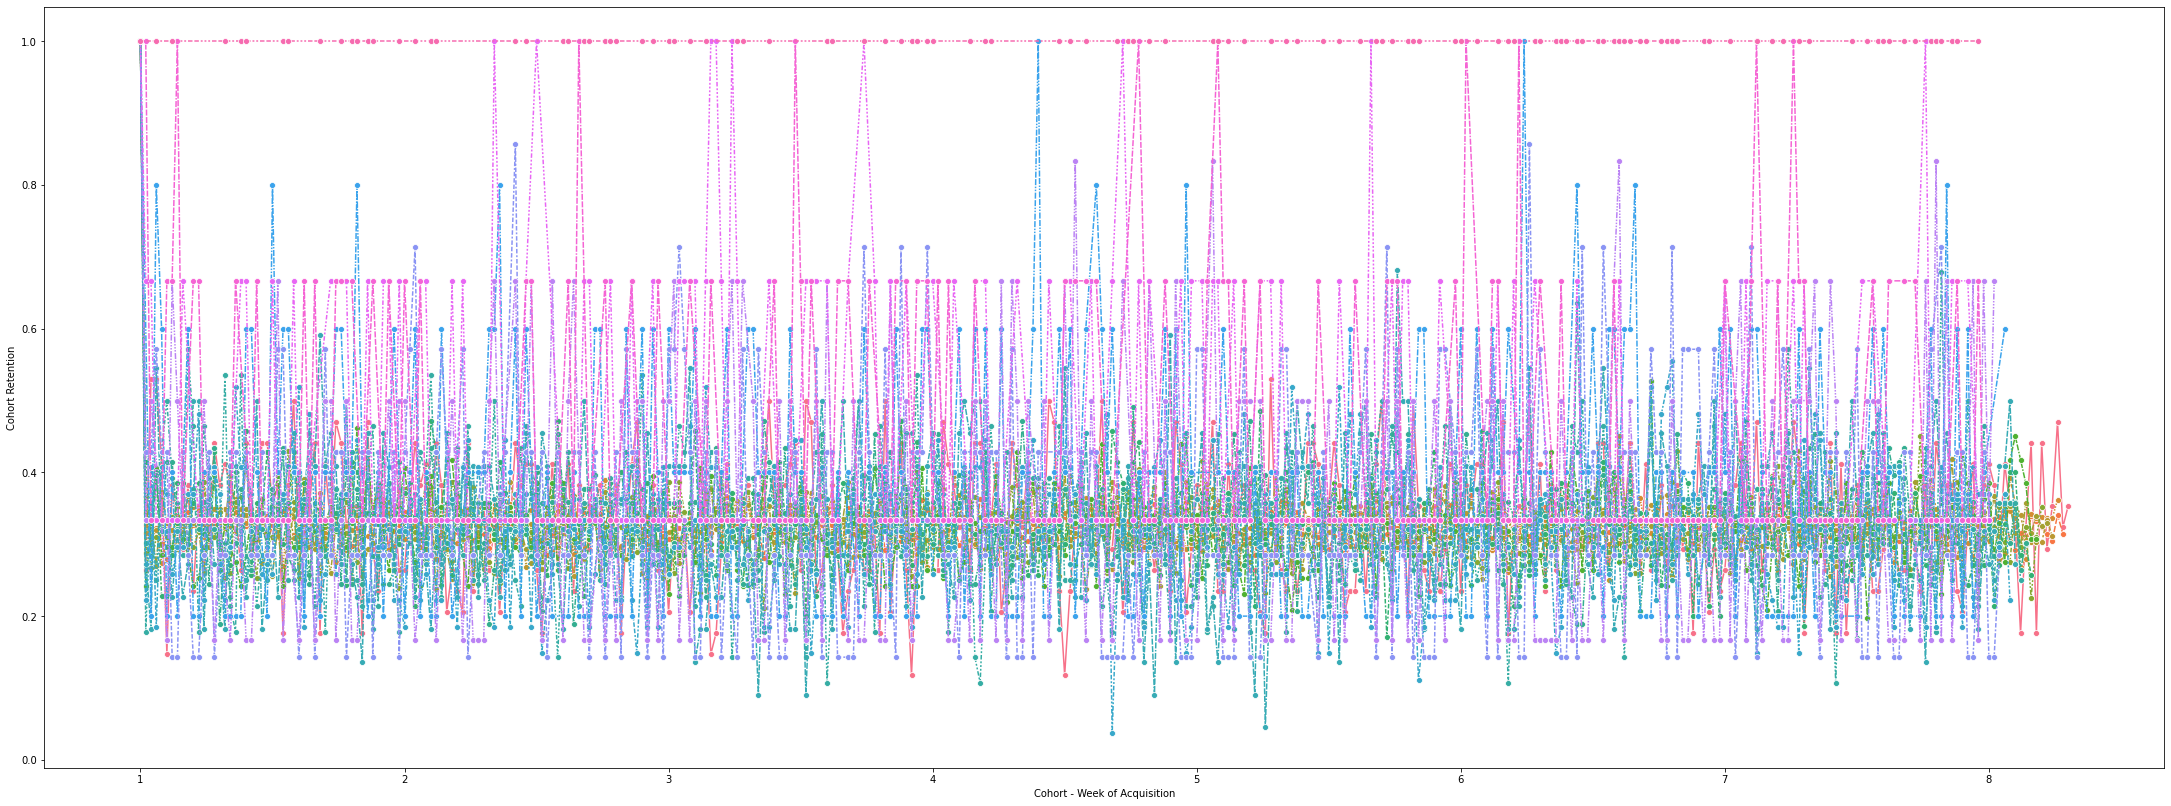

In [ ]:
plt.figure(figsize=(38,14))
ax = sns.lineplot(data = retention_rate_df.transpose(), legend = False, marker="o")
ax.set_xticklabels(retention_rate_df.transpose().index)
ax.set_ylabel("Cohort Retention")
ax.set_xlabel("Cohort - Week of Acquisition")

In [ ]:
retention_rate_df.to_csv('analysis_2020.csv')

#2019

In [ ]:
customers_1=df[df.Transaction_Year == '2019']
customers_1.head(2)

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
3,1680,2019-08-31 23:53:24,3001,3,18,good,online,website,-1,4,2019,September,01:53:24,1,3,Sunday,Weekend,No,None,dresses,100,300,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2019-08-31,2018-01-01
4,1680,2019-03-10 19:27:23,3001,1,43,excellent,online,unnamed,-1,5,2019,March,20:27:23,20,1,Sunday,Weekend,No,None,dresses,100,100,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2019-03-10,2018-01-01


In [ ]:
customers_1['order_date'] = customers_1['Transaction_Date'].dt.date
customers_1['cohort'] = customers_1.groupby('Customer_Id')['Transaction_Date'] \
                 .transform('min') \
                 .dt.date 
customers_1.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
3,1680,2019-08-31 23:53:24,3001,3,18,good,online,website,-1,4,2019,September,01:53:24,1,3,Sunday,Weekend,No,None,dresses,100,300,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2019-08-31,2019-01-02
4,1680,2019-03-10 19:27:23,3001,1,43,excellent,online,unnamed,-1,5,2019,March,20:27:23,20,1,Sunday,Weekend,No,None,dresses,100,100,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2019-03-10,2019-01-02


In [ ]:
cohort_df = customers_1.groupby(['cohort', 'order_date']) \
              .agg(n0_customers=('Customer_Id', 'nunique')) \
              .reset_index(drop=False)
cohort_df['Cohort_index'] = (cohort_df.order_date - cohort_df.cohort).apply(attrgetter('days'))
cohort_df

,cohort,order_date,n0_customers,Cohort_index
0,2018-12-31,2018-12-31,38,0
1,2018-12-31,2019-01-01,11,1
2,2018-12-31,2019-01-02,10,2
3,2018-12-31,2019-01-03,14,3
4,2018-12-31,2019-01-04,13,4
...,...,...,...,...
6267,2019-01-22,2019-12-20,1,332
6268,2019-01-22,2019-12-21,1,333
6269,2019-01-22,2019-12-23,1,335
6270,2019-01-22,2019-12-24,1,336


In [ ]:
cohort_pivot_df = cohort_df.pivot_table(index = 'cohort',
                                     columns = 'Cohort_index',
                                     values = 'n0_customers')
cohort_pivot_df

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-31,38.0,11.0,10.0,14.0,13.0,10.0,13.0,11.0,12.0,17.0,5.0,11.0,10.0,10.0,14.0,16.0,13.0,12.0,13.0,9.0,12.0,8.0,10.0,14.0,15.0,10.0,10.0,15.0,14.0,10.0,14.0,13.0,9.0,8.0,13.0,10.0,16.0,8.0,17.0,19.0,...,10.0,11.0,15.0,11.0,11.0,14.0,14.0,10.0,12.0,10.0,13.0,8.0,12.0,8.0,10.0,11.0,11.0,10.0,14.0,13.0,12.0,13.0,13.0,15.0,12.0,13.0,12.0,16.0,12.0,10.0,16.0,14.0,17.0,12.0,11.0,14.0,15.0,14.0,12.0,12.0
2019-01-01,730.0,246.0,209.0,247.0,233.0,215.0,237.0,230.0,240.0,235.0,242.0,205.0,244.0,256.0,235.0,234.0,243.0,234.0,232.0,209.0,228.0,222.0,217.0,241.0,228.0,241.0,240.0,242.0,223.0,236.0,246.0,229.0,221.0,263.0,242.0,245.0,244.0,254.0,251.0,255.0,...,223.0,243.0,220.0,237.0,248.0,223.0,232.0,227.0,232.0,241.0,259.0,225.0,237.0,230.0,236.0,247.0,235.0,243.0,229.0,236.0,263.0,222.0,232.0,267.0,235.0,240.0,238.0,235.0,233.0,212.0,251.0,242.0,237.0,227.0,252.0,222.0,208.0,255.0,250.0,NaN
2019-01-02,503.0,171.0,155.0,153.0,178.0,146.0,150.0,160.0,161.0,147.0,149.0,167.0,154.0,194.0,180.0,150.0,142.0,142.0,150.0,143.0,164.0,163.0,155.0,163.0,182.0,153.0,152.0,158.0,164.0,164.0,173.0,165.0,169.0,175.0,169.0,141.0,165.0,150.0,181.0,162.0,...,160.0,168.0,154.0,181.0,152.0,154.0,149.0,164.0,158.0,163.0,153.0,146.0,178.0,152.0,160.0,156.0,174.0,161.0,169.0,165.0,155.0,170.0,158.0,183.0,176.0,142.0,164.0,164.0,136.0,156.0,153.0,157.0,159.0,163.0,169.0,164.0,170.0,165.0,NaN,NaN
2019-01-03,287.0,105.0,102.0,89.0,102.0,100.0,90.0,88.0,88.0,99.0,82.0,97.0,103.0,100.0,78.0,88.0,88.0,95.0,103.0,89.0,90.0,98.0,84.0,82.0,76.0,87.0,90.0,93.0,80.0,81.0,86.0,89.0,94.0,103.0,85.0,74.0,100.0,89.0,94.0,102.0,...,85.0,97.0,98.0,68.0,96.0,95.0,82.0,97.0,92.0,84.0,90.0,92.0,93.0,91.0,81.0,87.0,82.0,88.0,95.0,97.0,97.0,97.0,92.0,90.0,94.0,89.0,73.0,83.0,102.0,89.0,93.0,101.0,82.0,76.0,86.0,107.0,91.0,NaN,NaN,NaN
2019-01-04,231.0,67.0,72.0,75.0,73.0,62.0,90.0,72.0,92.0,73.0,84.0,83.0,66.0,82.0,63.0,77.0,63.0,70.0,73.0,74.0,80.0,70.0,72.0,75.0,79.0,72.0,79.0,70.0,72.0,71.0,82.0,77.0,87.0,59.0,58.0,82.0,82.0,88.0,90.0,74.0,...,80.0,89.0,75.0,74.0,73.0,73.0,85.0,73.0,84.0,78.0,69.0,73.0,78.0,71.0,82.0,72.0,75.0,69.0,86.0,76.0,72.0,62.0,70.0,81.0,81.0,73.0,73.0,71.0,81.0,68.0,68.0,69.0,76.0,69.0,70.0,73.0,NaN,NaN,NaN,NaN
2019-01-05,140.0,42.0,34.0,40.0,37.0,42.0,41.0,38.0,39.0,43.0,53.0,43.0,42.0,39.0,57.0,42.0,47.0,45.0,44.0,56.0,42.0,55.0,48.0,43.0,40.0,43.0,49.0,51.0,38.0,46.0,47.0,41.0,49.0,46.0,41.0,47.0,28.0,42.0,42.0,38.0,...,42.0,46.0,60.0,40.0,54.0,39.0,42.0,45.0,53.0,34.0,61.0,47.0,51.0,49.0,45.0,43.0,45.0,45.0,55.0,42.0,50.0,39.0,47.0,46.0,41.0,48.0,43.0,48.0,64.0,41.0,39.0,38.0,48.0,46.0,44.0,NaN,NaN,NaN,NaN,NaN
2019-01-06,112.0,40.0,37.0,33.0,36.0,36.0,39.0,38.0,24.0,38.0,40.0,31.0,42.0,44.0,39.0,46.0,40.0,41.0,40.0,40.0,44.0,33.0,37.0,41.0,39.0,32.0,36.0,35.0,45.0,31.0,32.0,34.0,43.0,40.0,32.0,29.0,41.0,36.0,34.0,28.0,...,32.0,30.0,40.0,36.0,34.0,42.0,49.0,37.0,44.0,34.0,36.0,38.0,38.0,36.0,29.0,38.0,39.0,39.0,46.0,27.0,38.0,43.0,37.0,35.0,36.0,31.0,39.0,33.0,38.0,35.0,34.0,37.0,30.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,60.0,23.0,19.0,16.0,12.0,12.0,21.0,23.0,24.0,18.0,16.0,23.0,15.0,16.0,24.0,19.0,18.0,17.0,19.0,19.0,16.0,24.0,19.0,18.0,18.0,24.0,18.0,26.0,18.0,16.0,25.0,16.0,18.0,21.0,18.0,18.0,16.0,14.0,16.0,17.0,...,17.0,14.0,21.0,17.0,22.0,20.0,16.0,16.0,21.0,19.0,16.0,22.0,18.0,18.0,18.0,27.0,20.0,23.0,23.0,19.0,22.0,22.0,15.0,19.0,17.0,13.0,19.0,21.0,21.0,16.0,18.0,14.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,48.0,12.0,9.0,15.0,20.0,13.0,14.0,11.0,12.0,14.0,12.0,11.0,19.0,17.0,14.0,13.0,15.0,17.0,20.0,11.0,15.0,12.0,12.0,13.0,15.0,15.0,19.0,15.0,12.0,12.0,16.0,20

In [ ]:
cohort_sizes_df = cohort_pivot_df.iloc[:,0]

In [ ]:
#Now we will divide the values in all the columns with values in Column 1 Row-Wise
# Divide the cohort count by cohort sizes along the rows
retention_rate_df =  cohort_pivot_df.divide(cohort_sizes_df, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention_rate_df

# printing top 5 rows of retention Rate
retention_rate_df.round(3)*100

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-31,100.0,28.9,26.3,36.8,34.2,26.3,34.2,28.9,31.6,44.7,13.2,28.9,26.3,26.3,36.8,42.1,34.2,31.6,34.2,23.7,31.6,21.1,26.3,36.8,39.5,26.3,26.3,39.5,36.8,26.3,36.8,34.2,23.7,21.1,34.2,26.3,42.1,21.1,44.7,50.0,...,26.3,28.9,39.5,28.9,28.9,36.8,36.8,26.3,31.6,26.3,34.2,21.1,31.6,21.1,26.3,28.9,28.9,26.3,36.8,34.2,31.6,34.2,34.2,39.5,31.6,34.2,31.6,42.1,31.6,26.3,42.1,36.8,44.7,31.6,28.9,36.8,39.5,36.8,31.6,31.6
2019-01-01,100.0,33.7,28.6,33.8,31.9,29.5,32.5,31.5,32.9,32.2,33.2,28.1,33.4,35.1,32.2,32.1,33.3,32.1,31.8,28.6,31.2,30.4,29.7,33.0,31.2,33.0,32.9,33.2,30.5,32.3,33.7,31.4,30.3,36.0,33.2,33.6,33.4,34.8,34.4,34.9,...,30.5,33.3,30.1,32.5,34.0,30.5,31.8,31.1,31.8,33.0,35.5,30.8,32.5,31.5,32.3,33.8,32.2,33.3,31.4,32.3,36.0,30.4,31.8,36.6,32.2,32.9,32.6,32.2,31.9,29.0,34.4,33.2,32.5,31.1,34.5,30.4,28.5,34.9,34.2,NaN
2019-01-02,100.0,34.0,30.8,30.4,35.4,29.0,29.8,31.8,32.0,29.2,29.6,33.2,30.6,38.6,35.8,29.8,28.2,28.2,29.8,28.4,32.6,32.4,30.8,32.4,36.2,30.4,30.2,31.4,32.6,32.6,34.4,32.8,33.6,34.8,33.6,28.0,32.8,29.8,36.0,32.2,...,31.8,33.4,30.6,36.0,30.2,30.6,29.6,32.6,31.4,32.4,30.4,29.0,35.4,30.2,31.8,31.0,34.6,32.0,33.6,32.8,30.8,33.8,31.4,36.4,35.0,28.2,32.6,32.6,27.0,31.0,30.4,31.2,31.6,32.4,33.6,32.6,33.8,32.8,NaN,NaN
2019-01-03,100.0,36.6,35.5,31.0,35.5,34.8,31.4,30.7,30.7,34.5,28.6,33.8,35.9,34.8,27.2,30.7,30.7,33.1,35.9,31.0,31.4,34.1,29.3,28.6,26.5,30.3,31.4,32.4,27.9,28.2,30.0,31.0,32.8,35.9,29.6,25.8,34.8,31.0,32.8,35.5,...,29.6,33.8,34.1,23.7,33.4,33.1,28.6,33.8,32.1,29.3,31.4,32.1,32.4,31.7,28.2,30.3,28.6,30.7,33.1,33.8,33.8,33.8,32.1,31.4,32.8,31.0,25.4,28.9,35.5,31.0,32.4,35.2,28.6,26.5,30.0,37.3,31.7,NaN,NaN,NaN
2019-01-04,100.0,29.0,31.2,32.5,31.6,26.8,39.0,31.2,39.8,31.6,36.4,35.9,28.6,35.5,27.3,33.3,27.3,30.3,31.6,32.0,34.6,30.3,31.2,32.5,34.2,31.2,34.2,30.3,31.2,30.7,35.5,33.3,37.7,25.5,25.1,35.5,35.5,38.1,39.0,32.0,...,34.6,38.5,32.5,32.0,31.6,31.6,36.8,31.6,36.4,33.8,29.9,31.6,33.8,30.7,35.5,31.2,32.5,29.9,37.2,32.9,31.2,26.8,30.3,35.1,35.1,31.6,31.6,30.7,35.1,29.4,29.4,29.9,32.9,29.9,30.3,31.6,NaN,NaN,NaN,NaN
2019-01-05,100.0,30.0,24.3,28.6,26.4,30.0,29.3,27.1,27.9,30.7,37.9,30.7,30.0,27.9,40.7,30.0,33.6,32.1,31.4,40.0,30.0,39.3,34.3,30.7,28.6,30.7,35.0,36.4,27.1,32.9,33.6,29.3,35.0,32.9,29.3,33.6,20.0,30.0,30.0,27.1,...,30.0,32.9,42.9,28.6,38.6,27.9,30.0,32.1,37.9,24.3,43.6,33.6,36.4,35.0,32.1,30.7,32.1,32.1,39.3,30.0,35.7,27.9,33.6,32.9,29.3,34.3,30.7,34.3,45.7,29.3,27.9,27.1,34.3,32.9,31.4,NaN,NaN,NaN,NaN,NaN
2019-01-06,100.0,35.7,33.0,29.5,32.1,32.1,34.8,33.9,21.4,33.9,35.7,27.7,37.5,39.3,34.8,41.1,35.7,36.6,35.7,35.7,39.3,29.5,33.0,36.6,34.8,28.6,32.1,31.2,40.2,27.7,28.6,30.4,38.4,35.7,28.6,25.9,36.6,32.1,30.4,25.0,...,28.6,26.8,35.7,32.1,30.4,37.5,43.8,33.0,39.3,30.4,32.1,33.9,33.9,32.1,25.9,33.9,34.8,34.8,41.1,24.1,33.9,38.4,33.0,31.2,32.1,27.7,34.8,29.5,33.9,31.2,30.4,33.0,26.8,32.1,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,100.0,38.3,31.7,26.7,20.0,20.0,35.0,38.3,40.0,30.0,26.7,38.3,25.0,26.7,40.0,31.7,30.0,28.3,31.7,31.7,26.7,40.0,31.7,30.0,30.0,40.0,30.0,43.3,30.0,26.7,41.7,26.7,30.0,35.0,30.0,30.0,26.7,23.3,26.7,28.3,...,28.3,23.3,35.0,28.3,36.7,33.3,26.7,26.7,35.0,31.7,26.7,36.7,30.0,30.0,30.0,45.0,33.3,38.3,38.3,31.7,36.7,36.7,25.0,31.7,28.3,21.7,31.7,35.0,35.0,26.7,30.0,23.3,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,100.0,25.0,18.8,31.2,41.7,27.1,29.2,22.9,25.0,29.2,25.0,22.9,39.6,35.4,29.2,27.1,31.2,35.4,41.7,22.9,31.2,25.0,25.0,27.1,31.2,31.2,39.6,31.2,25.0,25.0,33.3,41.7,41.7,35.4,33.3,14.6,33.3,35.4,41.7,29.2,...,35.4,45.8,27.1,33.3,29.2,29.2,33.3,33.3,33.3,20.8,25.0,25.0,33.3,29.2,33.3,31.2,39.6,37.5,29.2,35.4,31.2,45.8

In [ ]:
retention_rate_df.to_csv('analysis_2019.csv')

#2018

In [ ]:
#yearly trends for cohort analysis
df.head(2)

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
0,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-09-28,2018-01-01
1,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2020-06-12,2018-01-01


In [ ]:
customers_2=df[df.Transaction_Year == '2018']
customers_2.head(2)

,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
6,1680,2018-07-18 00:59:29,3001,6,28,poor,showroom,website,2,1,2018,July,02:59:29,2,3,Wednesday,Weekday,No,None,dresses,100,600,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2018-07-18,2018-01-01
8,1680,2018-07-22 08:20:32,3001,10,71,poor,showroom,referral,11,1,2018,July,10:20:32,10,3,Sunday,Weekend,No,None,dresses,100,1000,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2018-07-22,2018-01-01


In [ ]:
customers_2['order_date'] = customers_2['Transaction_Date'].dt.date
customers_2['cohort'] = customers_2.groupby('Customer_Id')['Transaction_Date'] \
                 .transform('min') \
                 .dt.date 
customers_2.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Address,Recency,Current_Age,Town,State,Transaction_Age,order_date,cohort
6,1680,2018-07-18 00:59:29,3001,6,28,poor,showroom,website,2,1,2018,July,02:59:29,2,3,Wednesday,Weekday,No,None,dresses,100,600,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2018-07-18,2018-01-01
8,1680,2018-07-22 08:20:32,3001,10,71,poor,showroom,referral,11,1,2018,July,10:20:32,10,3,Sunday,Weekend,No,None,dresses,100,1000,Herr Jan Geisel B.A.,F,Lindaugasse 17\n49311 Schwerin,74,50.0,Schwerin,Mecklenburg-Vorpommern,50.0,2018-07-22,2018-01-01


In [ ]:
cohort_df = customers_2.groupby(['cohort', 'order_date']) \
              .agg(n0_customers=('Customer_Id', 'nunique')) \
              .reset_index(drop=False)
cohort_df['Cohort_index'] = (cohort_df.order_date - cohort_df.cohort).apply(attrgetter('days'))
cohort_df

,cohort,order_date,n0_customers,Cohort_index
0,2018-01-01,2018-01-01,732,0
1,2018-01-01,2018-01-02,224,1
2,2018-01-01,2018-01-03,221,2
3,2018-01-01,2018-01-04,237,3
4,2018-01-01,2018-01-05,229,4
...,...,...,...,...
6363,2018-01-24,2018-12-16,1,326
6364,2018-01-24,2018-12-20,1,330
6365,2018-01-24,2018-12-25,1,335
6366,2018-01-24,2018-12-27,1,337


In [ ]:
#visual

In [ ]:
cohort_pivot_df = cohort_df.pivot_table(index = 'cohort',
                                     columns = 'Cohort_index',
                                     values = 'n0_customers')
cohort_pivot_df

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,732.0,224.0,221.0,237.0,229.0,231.0,244.0,236.0,268.0,212.0,248.0,237.0,245.0,221.0,249.0,226.0,235.0,215.0,251.0,229.0,228.0,242.0,243.0,230.0,260.0,226.0,239.0,241.0,243.0,232.0,224.0,226.0,241.0,249.0,221.0,215.0,233.0,243.0,237.0,250.0,...,237.0,226.0,229.0,240.0,231.0,229.0,229.0,230.0,245.0,227.0,213.0,219.0,221.0,224.0,223.0,252.0,219.0,224.0,236.0,241.0,244.0,224.0,227.0,238.0,228.0,228.0,242.0,245.0,230.0,260.0,244.0,237.0,225.0,243.0,236.0,224.0,236.0,228.0,228.0,235.0
2018-01-02,468.0,158.0,157.0,155.0,164.0,151.0,168.0,156.0,155.0,162.0,155.0,144.0,131.0,137.0,145.0,147.0,151.0,155.0,152.0,133.0,144.0,143.0,183.0,146.0,149.0,143.0,144.0,131.0,165.0,133.0,123.0,144.0,146.0,166.0,148.0,169.0,168.0,151.0,152.0,129.0,...,155.0,155.0,160.0,153.0,157.0,133.0,152.0,150.0,165.0,150.0,149.0,143.0,148.0,160.0,152.0,160.0,142.0,143.0,158.0,158.0,150.0,153.0,144.0,156.0,145.0,167.0,147.0,152.0,149.0,162.0,157.0,147.0,147.0,135.0,130.0,136.0,165.0,148.0,148.0,NaN
2018-01-03,356.0,105.0,117.0,107.0,108.0,122.0,114.0,118.0,116.0,119.0,117.0,118.0,117.0,106.0,106.0,124.0,105.0,118.0,115.0,118.0,104.0,116.0,120.0,113.0,104.0,117.0,127.0,103.0,126.0,109.0,113.0,123.0,119.0,112.0,99.0,114.0,114.0,124.0,105.0,121.0,...,128.0,116.0,118.0,122.0,102.0,118.0,125.0,116.0,111.0,106.0,101.0,105.0,116.0,118.0,115.0,104.0,116.0,125.0,114.0,92.0,105.0,122.0,104.0,99.0,106.0,109.0,128.0,103.0,105.0,124.0,114.0,127.0,118.0,117.0,106.0,96.0,98.0,119.0,NaN,NaN
2018-01-04,231.0,71.0,85.0,72.0,80.0,69.0,65.0,76.0,58.0,75.0,72.0,72.0,70.0,68.0,77.0,81.0,68.0,67.0,74.0,73.0,75.0,76.0,66.0,84.0,69.0,77.0,69.0,63.0,71.0,82.0,70.0,67.0,80.0,84.0,90.0,68.0,77.0,75.0,65.0,80.0,...,85.0,83.0,68.0,77.0,70.0,77.0,81.0,82.0,79.0,92.0,80.0,76.0,69.0,68.0,86.0,83.0,68.0,78.0,69.0,68.0,74.0,74.0,74.0,67.0,70.0,68.0,76.0,60.0,71.0,79.0,76.0,80.0,68.0,83.0,74.0,77.0,79.0,NaN,NaN,NaN
2018-01-05,150.0,51.0,51.0,47.0,50.0,45.0,52.0,41.0,47.0,43.0,58.0,50.0,51.0,44.0,44.0,42.0,50.0,45.0,44.0,49.0,44.0,41.0,41.0,36.0,53.0,50.0,50.0,49.0,56.0,42.0,49.0,47.0,44.0,59.0,46.0,53.0,51.0,47.0,56.0,42.0,...,44.0,51.0,54.0,51.0,39.0,57.0,51.0,48.0,54.0,44.0,54.0,50.0,52.0,33.0,44.0,51.0,37.0,49.0,60.0,44.0,59.0,37.0,47.0,40.0,39.0,53.0,48.0,54.0,42.0,58.0,41.0,47.0,48.0,46.0,56.0,40.0,NaN,NaN,NaN,NaN
2018-01-06,93.0,28.0,31.0,28.0,26.0,35.0,33.0,31.0,34.0,33.0,31.0,37.0,25.0,36.0,27.0,26.0,31.0,29.0,36.0,30.0,24.0,33.0,27.0,37.0,23.0,30.0,30.0,33.0,32.0,26.0,30.0,27.0,22.0,35.0,24.0,36.0,34.0,30.0,26.0,33.0,...,26.0,31.0,25.0,38.0,24.0,27.0,31.0,36.0,29.0,39.0,30.0,28.0,33.0,21.0,31.0,34.0,21.0,28.0,27.0,28.0,24.0,23.0,25.0,27.0,33.0,31.0,28.0,34.0,27.0,28.0,21.0,28.0,31.0,30.0,28.0,NaN,NaN,NaN,NaN,NaN
2018-01-07,70.0,18.0,16.0,20.0,19.0,23.0,25.0,19.0,31.0,21.0,23.0,21.0,25.0,24.0,21.0,20.0,18.0,21.0,14.0,16.0,17.0,22.0,23.0,22.0,20.0,22.0,17.0,19.0,20.0,23.0,15.0,28.0,24.0,20.0,21.0,15.0,19.0,22.0,19.0,27.0,...,19.0,27.0,25.0,25.0,22.0,30.0,20.0,18.0,16.0,20.0,24.0,26.0,22.0,24.0,29.0,20.0,28.0,26.0,31.0,28.0,26.0,28.0,22.0,21.0,26.0,19.0,36.0,14.0,25.0,20.0,17.0,22.0,21.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,42.0,11.0,15.0,13.0,13.0,10.0,16.0,17.0,17.0,14.0,11.0,11.0,17.0,14.0,10.0,10.0,16.0,11.0,11.0,14.0,15.0,21.0,13.0,14.0,14.0,12.0,14.0,11.0,13.0,13.0,15.0,11.0,17.0,8.0,14.0,14.0,7.0,15.0,14.0,12.0,...,19.0,8.0,17.0,15.0,16.0,19.0,13.0,14.0,16.0,12.0,14.0,11.0,10.0,17.0,9.0,13.0,12.0,12.0,15.0,22.0,15.0,9.0,16.0,7.0,8.0,15.0,12.0,19.0,13.0,12.0,17.0,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,32.0,12.0,8.0,12.0,14.0,9.0,8.0,11.0,13.0,9.0,11.0,10.0,9.0,13.0,10.0,10.0,9.0,9.0,11.0,11.0,9.

In [ ]:
cohort_sizes_df = cohort_pivot_df.iloc[:,0]

In [ ]:
#Now we will divide the values in all the columns with values in Column 1 Row-Wise
# Divide the cohort count by cohort sizes along the rows
retention_rate_df_2018 =  cohort_pivot_df.divide(cohort_sizes_df, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention_rate_df_2018

# printing top 5 rows of retention Rate
retention_rate_df_2018.round(3)*100

Cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364
cohort,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,30.6,30.2,32.4,31.3,31.6,33.3,32.2,36.6,29.0,33.9,32.4,33.5,30.2,34.0,30.9,32.1,29.4,34.3,31.3,31.1,33.1,33.2,31.4,35.5,30.9,32.7,32.9,33.2,31.7,30.6,30.9,32.9,34.0,30.2,29.4,31.8,33.2,32.4,34.2,...,32.4,30.9,31.3,32.8,31.6,31.3,31.3,31.4,33.5,31.0,29.1,29.9,30.2,30.6,30.5,34.4,29.9,30.6,32.2,32.9,33.3,30.6,31.0,32.5,31.1,31.1,33.1,33.5,31.4,35.5,33.3,32.4,30.7,33.2,32.2,30.6,32.2,31.1,31.1,32.1
2018-01-02,100.0,33.8,33.5,33.1,35.0,32.3,35.9,33.3,33.1,34.6,33.1,30.8,28.0,29.3,31.0,31.4,32.3,33.1,32.5,28.4,30.8,30.6,39.1,31.2,31.8,30.6,30.8,28.0,35.3,28.4,26.3,30.8,31.2,35.5,31.6,36.1,35.9,32.3,32.5,27.6,...,33.1,33.1,34.2,32.7,33.5,28.4,32.5,32.1,35.3,32.1,31.8,30.6,31.6,34.2,32.5,34.2,30.3,30.6,33.8,33.8,32.1,32.7,30.8,33.3,31.0,35.7,31.4,32.5,31.8,34.6,33.5,31.4,31.4,28.8,27.8,29.1,35.3,31.6,31.6,NaN
2018-01-03,100.0,29.5,32.9,30.1,30.3,34.3,32.0,33.1,32.6,33.4,32.9,33.1,32.9,29.8,29.8,34.8,29.5,33.1,32.3,33.1,29.2,32.6,33.7,31.7,29.2,32.9,35.7,28.9,35.4,30.6,31.7,34.6,33.4,31.5,27.8,32.0,32.0,34.8,29.5,34.0,...,36.0,32.6,33.1,34.3,28.7,33.1,35.1,32.6,31.2,29.8,28.4,29.5,32.6,33.1,32.3,29.2,32.6,35.1,32.0,25.8,29.5,34.3,29.2,27.8,29.8,30.6,36.0,28.9,29.5,34.8,32.0,35.7,33.1,32.9,29.8,27.0,27.5,33.4,NaN,NaN
2018-01-04,100.0,30.7,36.8,31.2,34.6,29.9,28.1,32.9,25.1,32.5,31.2,31.2,30.3,29.4,33.3,35.1,29.4,29.0,32.0,31.6,32.5,32.9,28.6,36.4,29.9,33.3,29.9,27.3,30.7,35.5,30.3,29.0,34.6,36.4,39.0,29.4,33.3,32.5,28.1,34.6,...,36.8,35.9,29.4,33.3,30.3,33.3,35.1,35.5,34.2,39.8,34.6,32.9,29.9,29.4,37.2,35.9,29.4,33.8,29.9,29.4,32.0,32.0,32.0,29.0,30.3,29.4,32.9,26.0,30.7,34.2,32.9,34.6,29.4,35.9,32.0,33.3,34.2,NaN,NaN,NaN
2018-01-05,100.0,34.0,34.0,31.3,33.3,30.0,34.7,27.3,31.3,28.7,38.7,33.3,34.0,29.3,29.3,28.0,33.3,30.0,29.3,32.7,29.3,27.3,27.3,24.0,35.3,33.3,33.3,32.7,37.3,28.0,32.7,31.3,29.3,39.3,30.7,35.3,34.0,31.3,37.3,28.0,...,29.3,34.0,36.0,34.0,26.0,38.0,34.0,32.0,36.0,29.3,36.0,33.3,34.7,22.0,29.3,34.0,24.7,32.7,40.0,29.3,39.3,24.7,31.3,26.7,26.0,35.3,32.0,36.0,28.0,38.7,27.3,31.3,32.0,30.7,37.3,26.7,NaN,NaN,NaN,NaN
2018-01-06,100.0,30.1,33.3,30.1,28.0,37.6,35.5,33.3,36.6,35.5,33.3,39.8,26.9,38.7,29.0,28.0,33.3,31.2,38.7,32.3,25.8,35.5,29.0,39.8,24.7,32.3,32.3,35.5,34.4,28.0,32.3,29.0,23.7,37.6,25.8,38.7,36.6,32.3,28.0,35.5,...,28.0,33.3,26.9,40.9,25.8,29.0,33.3,38.7,31.2,41.9,32.3,30.1,35.5,22.6,33.3,36.6,22.6,30.1,29.0,30.1,25.8,24.7,26.9,29.0,35.5,33.3,30.1,36.6,29.0,30.1,22.6,30.1,33.3,32.3,30.1,NaN,NaN,NaN,NaN,NaN
2018-01-07,100.0,25.7,22.9,28.6,27.1,32.9,35.7,27.1,44.3,30.0,32.9,30.0,35.7,34.3,30.0,28.6,25.7,30.0,20.0,22.9,24.3,31.4,32.9,31.4,28.6,31.4,24.3,27.1,28.6,32.9,21.4,40.0,34.3,28.6,30.0,21.4,27.1,31.4,27.1,38.6,...,27.1,38.6,35.7,35.7,31.4,42.9,28.6,25.7,22.9,28.6,34.3,37.1,31.4,34.3,41.4,28.6,40.0,37.1,44.3,40.0,37.1,40.0,31.4,30.0,37.1,27.1,51.4,20.0,35.7,28.6,24.3,31.4,30.0,34.3,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,100.0,26.2,35.7,31.0,31.0,23.8,38.1,40.5,40.5,33.3,26.2,26.2,40.5,33.3,23.8,23.8,38.1,26.2,26.2,33.3,35.7,50.0,31.0,33.3,33.3,28.6,33.3,26.2,31.0,31.0,35.7,26.2,40.5,19.0,33.3,33.3,16.7,35.7,33.3,28.6,...,45.2,19.0,40.5,35.7,38.1,45.2,31.0,33.3,38.1,28.6,33.3,26.2,23.8,40.5,21.4,31.0,28.6,28.6,35.7,52.4,35.7,21.4,38.1,16.7,19.0,35.7,28.6,45.2,31.0,28.6,40.5,26.2,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,100.0,37.5,25.0,37.5,43.8,28.1,25.0,34.4,40.6,28.1,34.4,31.2,28.1,40.6,31.2,31.2,28.1,28.1,34.4,34.4,28.1,21.9,40.6,28.1,21.9,37.5,21.9,43.8,31.2,21.9,34.4,18.8,31.2,25.0,25.0,40.6,28.1,53.1,21.9,34.4,...,21.9,31.2,31.2,34.4,28.1,50.0,40.6,34.4,50.0,43.8,31.2,43.8,28.1,34.4,28.1,28.1,46.9,40.6,43.8,37.5,37.5,28.1

In [ ]:
retention_rate_df_2018.to_csv('analysis_2018.csv')